## EDA KDD cup

### Setup

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

### Load in data

In [4]:
# read in column names
with open("colnames.txt") as columns:
    colnames = [line[:line.find(":")] for line in columns] # discard everything from ':' on per line

# add class column name
colnames.append("target")

In [6]:
# read in coarse class names
with open("training_attack_types") as attack_types:
    key_values = [line.strip() for line in attack_types][:-1]  # last line is empty
    
attacks_dict = {key+".": value for (key, value) in [pair.split(" ") for pair in key_values]} # the +"." accounts for an extra dot that seems to be present in the data
attacks_dict["normal."] = "normal"

In [9]:
# read in training data
kdd = pd.read_csv("kddcup.data.corrected",
                  sep=',',
                  names=colnames)

How does the df look? All went well?

In [11]:
kdd.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,235,1337,0,0,0,0,...,6,1.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,234,1364,0,0,0,0,...,7,1.0,0.0,0.14,0.0,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,239,1295,0,0,0,0,...,8,1.0,0.0,0.12,0.0,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.


In [12]:
kdd.tail(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
4898421,0,tcp,http,SF,286,2169,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.
4898422,0,tcp,http,SF,291,1096,0,0,0,0,...,255,1.0,0.0,0.03,0.05,0.03,0.01,0.0,0.0,normal.
4898423,0,tcp,http,SF,291,1862,0,0,0,0,...,255,1.0,0.0,0.03,0.05,0.03,0.01,0.0,0.0,normal.
4898424,0,tcp,http,SF,159,15808,0,0,0,0,...,255,1.0,0.0,1.00,0.05,0.00,0.01,0.0,0.0,normal.
4898425,0,tcp,http,SF,219,244,0,0,0,0,...,255,1.0,0.0,0.50,0.05,0.00,0.01,0.0,0.0,normal.
4898426,0,tcp,http,SF,212,2288,0,0,0,0,...,255,1.0,0.0,0.33,0.05,0.00,0.01,0.0,0.0,normal.
4898427,0,tcp,http,SF,219,236,0,0,0,0,...,255,1.0,0.0,0.25,0.05,0.00,0.01,0.0,0.0,normal.
4898428,0,tcp,http,SF,218,3610,0,0,0,0,...,255,1.0,0.0,0.20,0.05,0.00,0.01,0.0,0.0,normal.
4898429,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
4898430,0,tcp,http,SF,219,1098,0,0,0,0,...,255,1.0,0.0,0.14,0.05,0.00,0.01,0.0,0.0,normal.


In [13]:
kdd.sample(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
2815154,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
1573636,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
1768049,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
1340432,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
4371173,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
955041,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
249071,0,tcp,http,SF,230,13572,0,0,0,0,...,255,1.00,0.00,0.03,0.06,0.0,0.0,0.0,0.0,normal.
1602633,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
412498,0,tcp,ftp_data,SF,1342,0,0,0,0,0,...,94,0.35,0.03,0.35,0.02,0.0,0.0,0.0,0.0,normal.
3542826,0,tcp,private,S0,0,0,0,0,0,0,...,8,0.03,0.07,0.00,0.00,1.0,1.0,0.0,0.0,neptune.


I'll downsample for now, just to speed things up a bit. I intend to check again with full data.

In [14]:
kdd_copy = kdd.copy()
kdd = kdd.sample(frac=0.1)

Create coarse (=5 class) and binary targets

In [18]:
kdd["ctarget"] = [attacks_dict[attack] for attack in kdd.target] # coarse 5 classification
kdd["btarget"] = ["normal" if attack == "normal." else "attack" for attack in kdd.target] # binary classification
# check if worked well
kdd.sample(5) # looks okay

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,ctarget,btarget
1455042,0,udp,domain_u,SF,34,0,0,0,0,0,...,0.02,0.07,0.1,0.0,0.0,0.0,0.0,normal.,normal,normal
4624340,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.0,0.0,0.0,1.0,1.0,neptune.,dos,attack
866117,0,tcp,http,SF,189,2543,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,normal.,normal,normal
2640921,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,0.00,1.00,0.0,0.0,0.0,0.0,0.0,smurf.,dos,attack
666588,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.0,1.0,1.0,0.0,0.0,neptune.,dos,attack


### Actual EDA

#### Number of rows and columns

In [19]:
kdd.shape

(489843, 44)

44 columns minus 3 targets = 41 features
nrow needs to be updated

#### Missing data

In [20]:
kdd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489843 entries, 1445014 to 3107705
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     489843 non-null  int64  
 1   protocol_type                489843 non-null  object 
 2   service                      489843 non-null  object 
 3   flag                         489843 non-null  object 
 4   src_bytes                    489843 non-null  int64  
 5   dst_bytes                    489843 non-null  int64  
 6   land                         489843 non-null  int64  
 7   wrong_fragment               489843 non-null  int64  
 8   urgent                       489843 non-null  int64  
 9   hot                          489843 non-null  int64  
 10  num_failed_logins            489843 non-null  int64  
 11  logged_in                    489843 non-null  int64  
 12  num_compromised              489843 non-null  int64

We learn there are no missing data (seems only natural considering this is simulation data)

However, I feel we should anticipate eventual missing data in test set or 'in production'.

TODO: check if this is also the case for full data

#### Distributions

##### Categorical

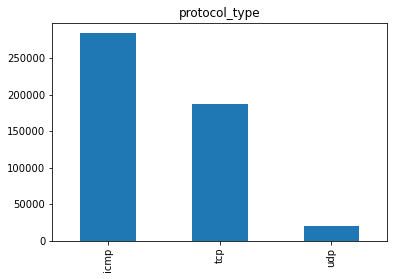

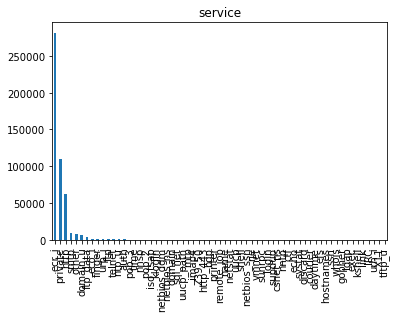

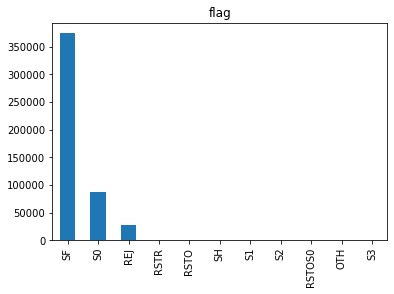

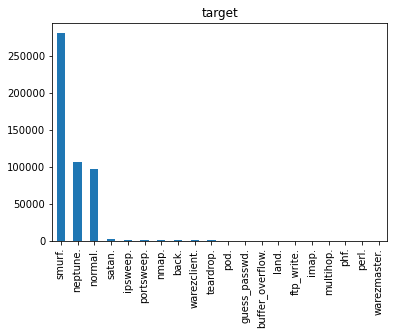

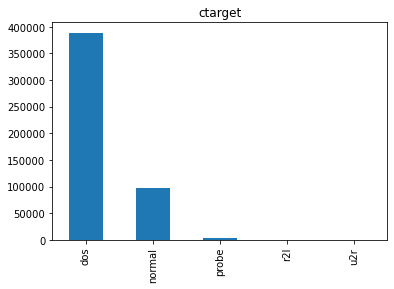

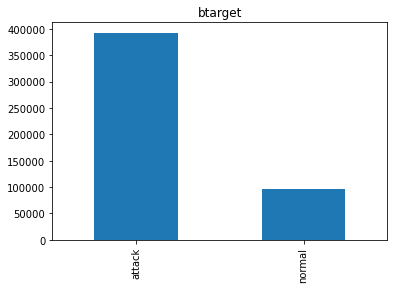

In [33]:
cat_features = ["protocol_type", "service", "flag", "target", "ctarget", "btarget"]

for catfeat in cat_features:
    kdd[catfeat].value_counts().plot.bar(title=catfeat)
    plt.show()

Conclusion: A lot of unbalanced factors. Also target = unbalanced.

Also (see further) is_guest_login and is_host_login are binary as well
Also (see further) logged_in and root_shell is also categorical

In [58]:
cat_features = cat_features + ["is_host_login", "is_guest_login"]

In [68]:
cat_features = cat_features + ["root_shell", "logged_in"]

##### Numeric

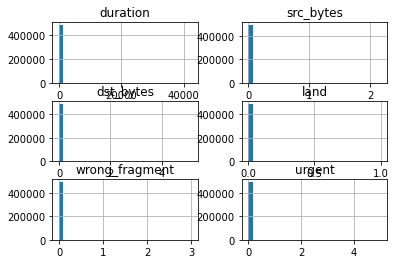

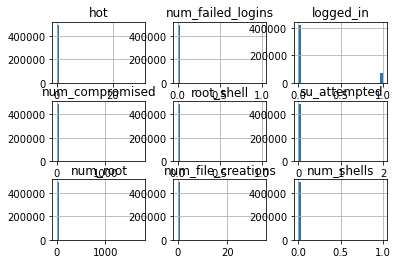

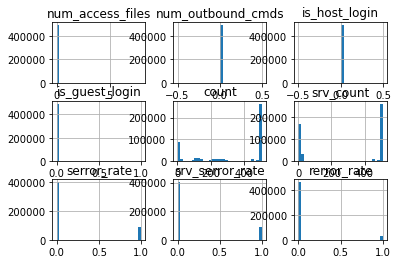

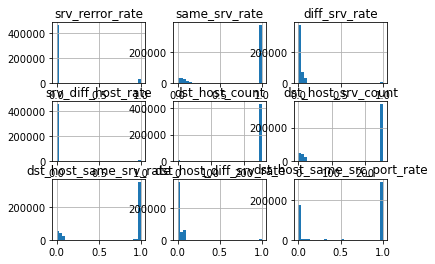

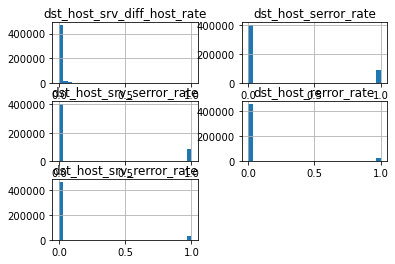

In [52]:
 ranges = [range(i, j) for i, j in zip(range(0,28,9), range(9, 37, 9))] + [range(36, 44)]
for features in ranges:
    kdd.iloc[:, features].hist(bins=30)
    plt.show()

Conclusion: A lot (if not all) of skewed distributions, a lot of them are bimodal.
Probably will be a good idea to look for some transformations here and there.

is_host_login and is_guest_login is probably binary

In [55]:
print(kdd.is_host_login.value_counts()) # not informative # TODO: still the same with full data?
print(kdd.is_guest_login.value_counts()) # binary

0    489843
Name: is_host_login, dtype: int64
0    489464
1       379
Name: is_guest_login, dtype: int64


also logged_in, root_shell and su_attempted are probably categorical

In [67]:
print(kdd.logged_in.value_counts()) # binary
print(kdd.root_shell.value_counts()) # binary
print(kdd.su_attempted.value_counts()) # 0, 1, 2 might be categorical # TODO: check with full data

0    419831
1     70012
Name: logged_in, dtype: int64
0    489815
1        28
Name: root_shell, dtype: int64
0    489831
2         8
1         4
Name: su_attempted, dtype: int64


In [73]:
targets = ["target", "ctarget", "btarget"]
num_features = list({c for c in colnames} - {t for t in targets} - {catf for catf in cat_features})
cat_features = list({catf for catf in cat_features} - {t for t in targets})

In [85]:
for _ in [targets, num_features, cat_features]:
    print(len(_))

3
34
7


Let's try a scatter plot matrix. We won't plot all p(p-1)/2 combinations though. That wouldn't be very 

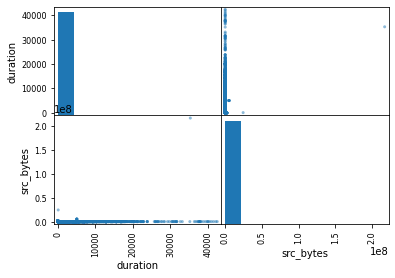

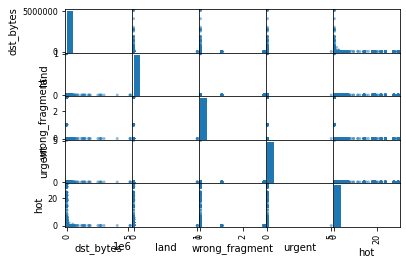

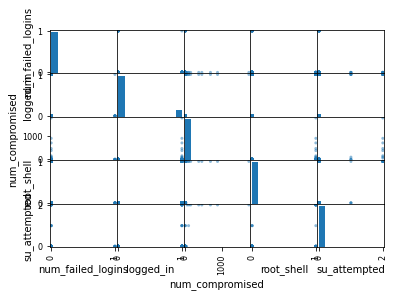

C:\anaconda3\envs\big_data_science\lib\site-packages\pandas\plotting\_matplotlib\misc.py:89: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\anaconda3\envs\big_data_science\lib\site-packages\pandas\plotting\_matplotlib\misc.py:90: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\anaconda3\envs\big_data_science\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


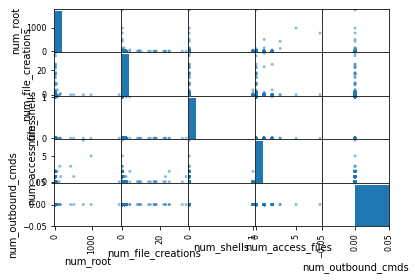

C:\anaconda3\envs\big_data_science\lib\site-packages\pandas\plotting\_matplotlib\misc.py:104: RuntimeWarning: invalid value encountered in true_divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])


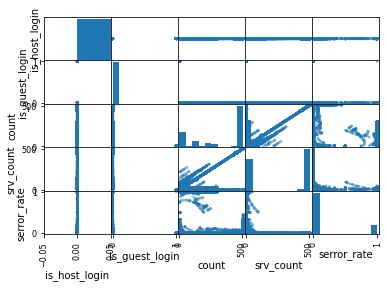

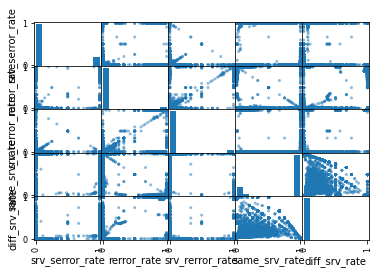

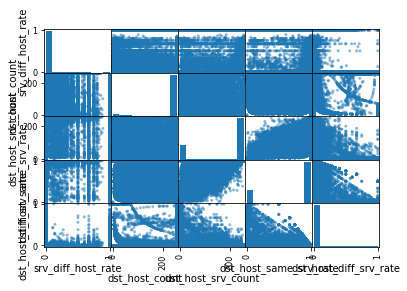

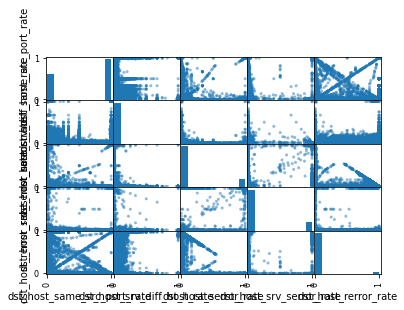

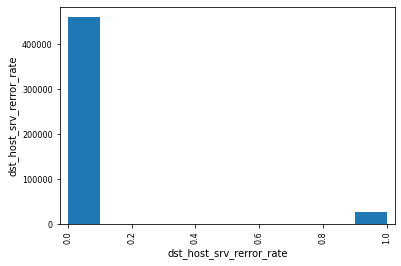

In [92]:
ranges = [range(i, j) for i, j in zip(range(0,36,5), range(5, 41, 5))] + [range(40, 44)]
for features in ranges:
    scatter_matrix(kdd.iloc[:, features])
    plt.show()

### Visualization

In [135]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x2d = pca.fit_transform(kdd.loc[:, num_features])

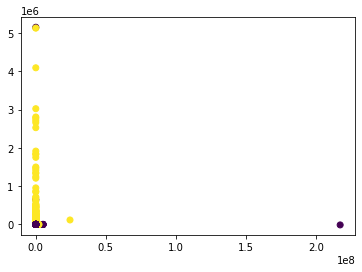

In [140]:
fig, ax = plt.subplots()
ax.scatter(x2d[:,0], x2d[:,1], c=[int(_=="normal") for _ in kdd.btarget])

In [155]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
kdd_tiny = kdd.sample(frac=0.01).loc[:, num_features + targets]
kdd_tiny_targets = kdd_tiny.loc[:, targets]
kdd_tiny = kdd_tiny.iloc[:, :-3]
Xkpca = rbf_pca.fit_transform(kdd_tiny.loc[:, num_features])

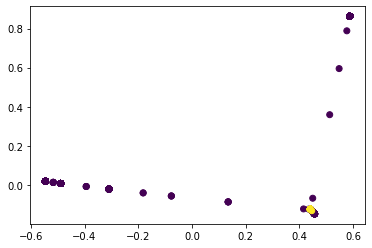

In [156]:
fig, ax = plt.subplots()
ax.scatter(Xkpca[:,0], Xkpca[:,1], c=[int(_=="normal") for _ in kdd_tiny_targets.btarget])